### Creating a test file from the inference test:

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
from tqdm import tqdm

import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

import gempyor
import pathlib, copy
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.colors as mcolors
import matplotlib.cm as cm
import subprocess

import multiprocessing as mp
pool = mp.Pool(4) # mp.cpu_count()-1

In [90]:
fn = 's3pull/test/hosp/USA/inference/med/SMH_R13_pessWan_Var_blk5_rk4_test/global/intermediate/000000101.000000001.SMH_R13_pessWan_Var_blk5_rk4_test.hosp.parquet'
gempyor.read_df(fn).isna().any().any()

False

In [88]:
gempyor.read_df(fn.replace('hosp', 'hnpi'))

geoid                  npi_name  start_date    end_date  \
0    01000       AL_incidCshift1_R13  2020-01-01  2020-05-14   
1    01000       AL_incidCshift2_R13  2020-05-15  2021-02-20   
2    01000   AL_incidCshift_vacc_R13  2021-02-21  2021-07-10   
3    01000  AL_incidCshift_delta_R13  2021-07-11  2021-11-30   
4    01000      AL_incidCshiftOm_R13  2021-12-01  2023-03-11   
..     ...                       ...         ...         ...   
238  55000      WI_incidCshiftOm_R13  2021-12-01  2023-03-11   
239  56000        WY_incidCshift_R13  2020-01-01  2021-02-20   
240  56000   WY_incidCshift_vacc_R13  2021-02-21  2021-07-10   
241  56000  WY_incidCshift_delta_R13  2021-07-11  2021-11-30   
242  56000      WY_incidCshiftOm_R13  2021-12-01  2023-03-11   

             parameter  reduction  
0    inciditoc_all_r13   0.871534  
1    inciditoc_all_r13   0.893269  
2    inciditoc_all_r13   0.450338  
3    inciditoc_all_r13   0.807991  
4    inciditoc_all_r13   0.730860  
..                 ...        ...  
238  inciditoc_all_r13   0.741622  
239  inciditoc_all_r13   0.586167  
240  inciditoc_all_r13   0.304329  
241  inciditoc_all_r13   0.493342  
242  inciditoc_all_r13   0.860182  

[243 rows x 6 columns]

In [1]:
import gempyor # incidCshift_delta_R13
from gempyor import seir, config

config_filepath = "../COVID19_USA/config_SMH_R13_optWan_noVar_blk5_rk4.yml"
gempyor_simulator = gempyor.InferenceSimulator(
    config_path=config_filepath,
    run_id="test_run_id",
    prefix="test_prefix/",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="../COVID19_USA/",  # prefix where to find the folder indicated in spatial_setup$
)
config.clear()
config.read(user=False)
config.set_file(config_filepath)


#gempyor.read_df('model_output/hnpi/USA/inference/med/2022.03.18.10:52:13.CET/glo')
gempyor_simulator.get_outcome_npi()

  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[Outcomes.NPI] completed in 1.55 s


In [5]:



for run_name, run_spec in all_runs.items():

    folder = run_spec['folder']
    
    betas[run_name] = []
    seeds[run_name] = []
    snpis[run_name] = []
    r0s[run_name] = []
    diffIs[run_name] = []
    reduced_params[run_name] = []
    

    print(f'Exploring {str(folder)[:]} ... ', end = '')
    
    snpi_fns = list(Path(str(folder)).rglob('*.parquet'))[:maxfiles]
    
    reduced_params[run_name] = pool.starmap(gempyor.paramred_parallel, [(copy.deepcopy(run_spec), str(snpi_fn)) for snpi_fn in snpi_fns])
    
    

    #file_loaded= 0
    #for snpi_fn in Path(str(folder)).rglob('*.parquet'):
    #    snpi_fn = str(snpi_fn)
    #    if (('chimeric' not in snpi_fn) and (files_loaded < maxfiles)):
    #        slot = int(snpi_fn.split('/')[-1].split('.')[0])
    #        sim = snpi_fn.split('/')[-1].split('.')[1]
    #        print(slot, sim)
            #hpar =  pq.read_table(hpar_fn).to_pandas()
            #delay = int(list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'delay')].value)[0])
            #vals = list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'probability')].value)
            #hospf = pq.read_table(hpar_fn.replace('hpar', 'hosp')).to_pandas()
            #seirf = pq.read_table(snpi_fn.replace('snpi', 'seir')).to_pandas()
            #seed = pd.read_csv(snpi_fn.replace('snpi', 'seed').replace('.parquet','.csv'))
            #diffIs[run_name].append(seirf)
            #seeds[run_name].append(seed)

            #npi_outcome = gempyor_simulator.get_outcome_npi()



     #       files_loaded += 1

   # print(files_loaded, 'files read')

Exploring s3pull/test/snpi/USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar13/global/final/ ... 

INFO:root:[SEIR.NPI] completed in 113.74 s
INFO:root:[SEIR.NPI] completed in 114.18 s
INFO:root:[SEIR.NPI] completed in 114.43 s
INFO:root:[SEIR.NPI] completed in 114.75 s
INFO:root:[SEIR.NPI] completed in 114.20 s
INFO:root:[SEIR.NPI] completed in 114.66 s
INFO:root:[SEIR.NPI] completed in 114.45 s
INFO:root:[SEIR.NPI] completed in 114.52 s
INFO:root:[SEIR.NPI] completed in 114.54 s
INFO:root:[SEIR.NPI] completed in 114.95 s
INFO:root:[SEIR.NPI] completed in 114.86 s
INFO:root:[SEIR.NPI] completed in 114.89 s
INFO:root:[SEIR.NPI] completed in 115.20 s
INFO:root:[SEIR.NPI] completed in 115.03 s
INFO:root:[SEIR.NPI] completed in 115.03 s
INFO:root:[SEIR.NPI] completed in 141.46 s
INFO:root:[SEIR.NPI] completed in 140.86 s
INFO:root:[SEIR.NPI] completed in 141.42 s
INFO:root:[SEIR.NPI] completed in 141.10 s
INFO:root:[SEIR.NPI] completed in 141.48 s
INFO:root:[SEIR.NPI] completed in 141.48 s
INFO:root:[SEIR.NPI] completed in 141.24 s
INFO:root:[SEIR.NPI] completed in 141.43 s
INFO:root:[

In [224]:
#import multiprocessing as mp
#pool = mp.Pool(4)
run_name='from'
run_spec= all_runs[run_name]
folder = run_spec['folder']
print(f'Exploring {str(folder)[:]} ... ', end = '')
snpi_fns = list(Path(str(folder)).rglob('*.parquet'))[:maxfiles]

#reduced_params[run_name] = pool.starmap(gempyor.paramred_parallel, [(copy.deepcopy(run_spec), str(snpi_fn)) for snpi_fn in snpi_fns])
reduced_params[run_name] = []
for snpi_fn in snpi_fns:
    reduced_params[run_name].append(gempyor.paramred_parallel(run_spec, str(snpi_fn)))

Exploring s3pull/from/snpi/USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar6_covidcast/global/final/ ...   gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.71 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 37.27 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.18 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.15 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.29 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.83 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.04 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.15 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.83 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.96 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.13 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.96 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.94 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.81 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.62 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.86 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.82 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.65 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.37 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 25.10 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.41 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.86 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.67 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.78 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.89 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.86 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.58 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.17 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.57 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.77 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.02 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.60 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.64 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.09 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.04 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 42.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 42.21 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.15 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.60 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.29 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.69 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.47 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.24 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.34 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.55 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.94 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.54 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.07 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.12 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.51 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.63 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.69 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.57 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.98 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.53 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.86 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.86 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.90 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.80 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.68 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 41.64 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.70 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.81 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.75 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.76 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 41.69 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.98 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.85 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.89 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.06 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.83 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.03 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.89 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.63 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 41.18 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.10 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.96 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.85 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.02 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.88 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.85 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.05 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.02 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.94 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.67 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.65 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.71 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.66 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 38.61 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 48.27 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 33.90 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.60 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.88 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.81 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.33 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.40 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.71 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 33.87 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.84 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 43.81 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 33.67 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.89 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.10 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.16 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 42.29 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.39 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.97 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 47.43 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.34 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.10 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.49 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.61 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.31 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.95 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.35 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.99 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.48 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.04 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.69 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.37 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.06 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.12 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.90 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.18 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.73 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.40 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.37 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.40 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.31 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.23 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.54 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.13 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.21 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.09 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.38 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.22 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.26 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.63 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.30 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.77 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.05 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.86 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.69 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.19 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.21 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.84 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.36 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.98 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.41 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.07 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.05 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.21 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.40 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.17 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.29 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.01 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.42 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.04 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.23 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.32 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.64 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.32 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.81 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.56 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.36 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 28.99 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.33 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.44 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.62 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.67 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.32 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.32 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.59 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.41 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.04 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.94 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.36 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.17 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.04 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.86 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.62 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.39 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.43 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.76 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.25 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.05 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.44 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.11 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.29 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.12 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.45 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.78 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.12 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.53 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.21 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.83 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.51 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.41 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.14 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.21 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.01 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.94 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.00 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.90 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.99 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.27 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.59 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.63 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.29 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.79 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.06 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.91 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.01 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.07 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.58 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.34 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.52 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.72 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.21 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.31 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.62 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.75 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.19 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.25 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.62 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.58 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.58 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.66 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.24 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.34 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.44 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.20 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.45 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.56 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.52 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 41.03 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.60 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.33 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.37 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.08 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.10 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.58 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.55 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.76 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.14 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.50 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.79 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.41 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.88 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.46 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 41.30 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.59 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.05 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.58 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.24 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 31.02 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.34 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.26 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 30.51 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 29.98 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 40.59 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.98 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.99 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 41.07 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 43.04 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 48.16 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 37.69 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.49 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.02 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 43.11 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 38.35 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.15 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.77 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 33.99 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.12 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 47.17 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.57 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.54 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.26 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 33.34 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 32.97 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 34.89 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.83 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.31 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 37.97 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 49.97 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 38.76 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 35.51 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 39.13 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 38.76 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 47.52 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.48 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.33 s


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: test_run_id,
  gempyor >> prefix: test_prefix/;


INFO:root:[SEIR.NPI] completed in 36.53 s


In [225]:
print('done')

done


In [ ]:
run_name = 'prior'
run_spec = all_runs['to']
#pool = mp.Pool(5)
#reduced_params[run_name] = pool.starmap(gempyor.paramred_parallel_config, [(copy.deepcopy(run_spec), i) for i in range(10)])
reduced_params[run_name] = []
print('ok')
for i in range(10):
    reduced_params[run_name].append(gempyor.paramred_parallel_config(run_spec, i))

to 300
prior 300
from 300


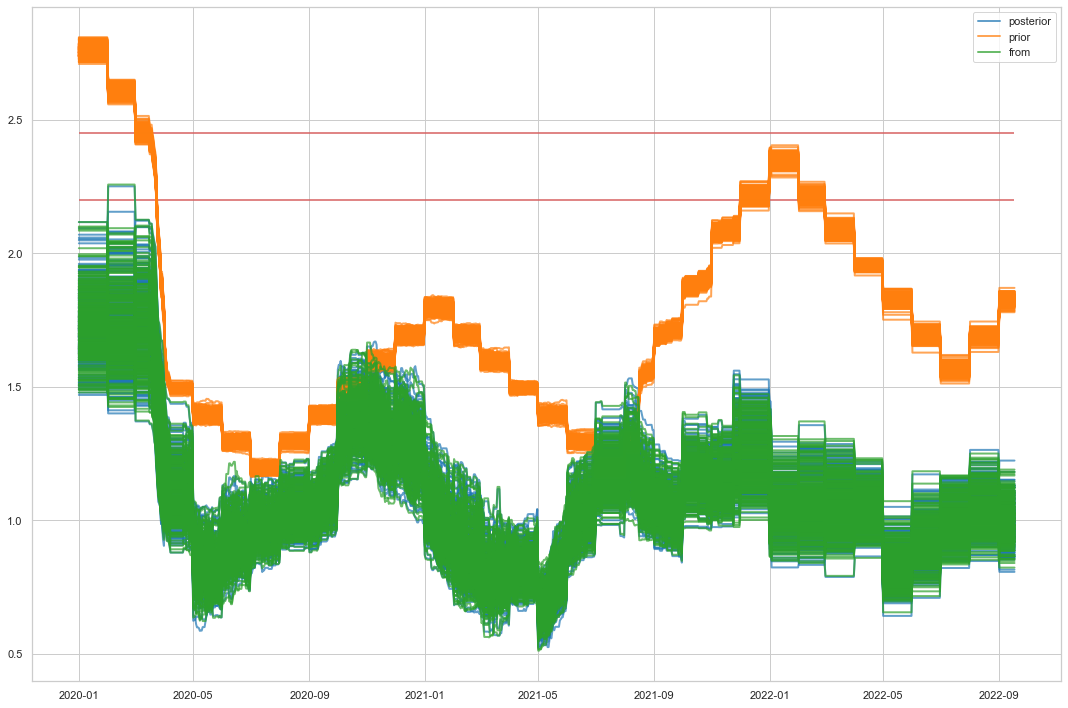

In [226]:
fig, axes = plt.subplots(1,1, figsize = (15,10))

colors = ['r', 'b','orange', 'green']
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']
ax = axes
i = 0
for run_name, run_spec in reduced_params.items():
    label = run_name
    if label=='to': label = "posterior"
    print(run_name, len(reduced_params[run_name]))
    for sim, ts in enumerate(reduced_params[run_name]):
        a = ts[['r0', 'geoid', 'date']].pivot(columns='geoid', values='r0', index='date').mean(axis=1)
        ax.plot(a, colors[i],  ls='-', alpha=0.7, label = label, lw=2) # lw = int(sim),
        label = '_'
       
       # ax.set_yscale('log')
    i+=1
fig.tight_layout()
fig.set_facecolor('white')
ax.legend()
ax.grid()
ax.grid()
ax.hlines(2.2, xmin=a.index[0], xmax=a.index[-1], color='r')
ax.hlines(2.45, xmin=a.index[0], xmax=a.index[-1], color='r')
#ax.set_xlim('2021-05-01','2021-11-01')
#ax.set_ylim(0.4,0.6)

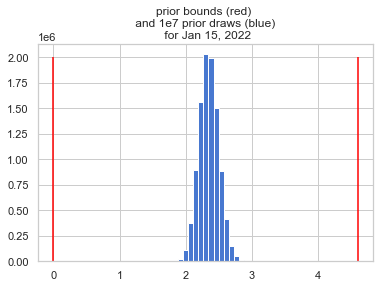

In [208]:
import scipy
# same truncated normal as gempyor
def get_truncated_normal(*, mean=0, sd=1, a=0, b=10): 
    return scipy.stats.truncnorm((a - mean) / sd, (b - mean) / sd, loc=mean, scale=sd)

# these two NPIs are active on Jan 15, 2022
seas_jan_red = get_truncated_normal(mean=-0.2, sd=0.05, a=-1, b=1).rvs
school_year = get_truncated_normal(mean=0.15,sd=0.025, a=0, b=0.9).rvs
local_variance = get_truncated_normal(mean=0.0,sd=0.025, a=-1, b=1).rvs

ndraw = int(1e7)
# base r0 is fixed at 2.3 -- we draw the reductions
r0_prior = 2.3*(1-school_year(ndraw))*(1-seas_jan_red(ndraw))*(1-local_variance(ndraw))*(1-local_variance(ndraw))

plt.hist(r0_prior, bins=20)
plt.vlines(2.3 *(1-(-1))*(1-0)*(1-0)*(1-0), 0, ndraw/5, color='red') # bound a
plt.vlines(2.3 *(1-(.9))*(1-1)*(1-1)*(1-1), 0, ndraw/5, color='red') # bound b
plt.title("prior bounds (red) \n and 1e7 prior draws (blue) \n for Jan 15, 2022");

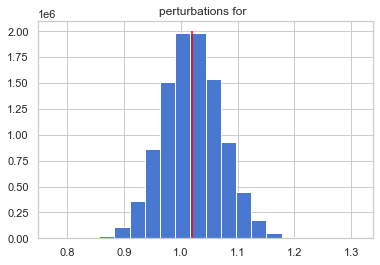

In [209]:

plt.hist((1-(.15+perturbation(ndraw)))*(1-(-.2+perturbation(ndraw)))*(1-(0+perturbation(ndraw)))*(1-(0+perturbation(ndraw))), bins=20);
plt.vlines((1-(-.2))*(1-.15), 0, ndraw/5, color='red') # bound b
plt.title("perturbations for  ");

1.02

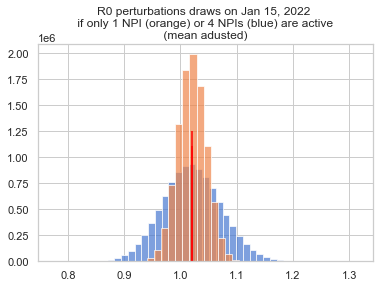

In [212]:
perturbation = get_truncated_normal(mean=0.0,sd=0.025, a=-1, b=1).rvs
plt.hist((1-(.15+perturbation(ndraw)))*(1-(-.2+perturbation(ndraw)))*(1-(0+perturbation(ndraw)))*(1-(0+perturbation(ndraw))), bins=45, alpha = .7);
plt.hist((1-(-0.02+perturbation(ndraw))), bins=20, alpha=.7);  ## mean is -0.02 as reduction 
plt.vlines((1-(-.2))*(1-.15), 0, ndraw/9, color='red')
plt.vlines((1-(-0.02)), 0, ndraw/8, color='red') # bound b
plt.title("R0 perturbations draws on Jan 15, 2022 \n if only 1 NPI (orange) or 4 NPIs (blue) are active \n (mean adusted) ");

to 300
prior 300


/var/folders/y5/jj4qlxkx619gkh07d2zt6h840000gn/T/ipykernel_21856/3358607138.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('snpi.pdf')
/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


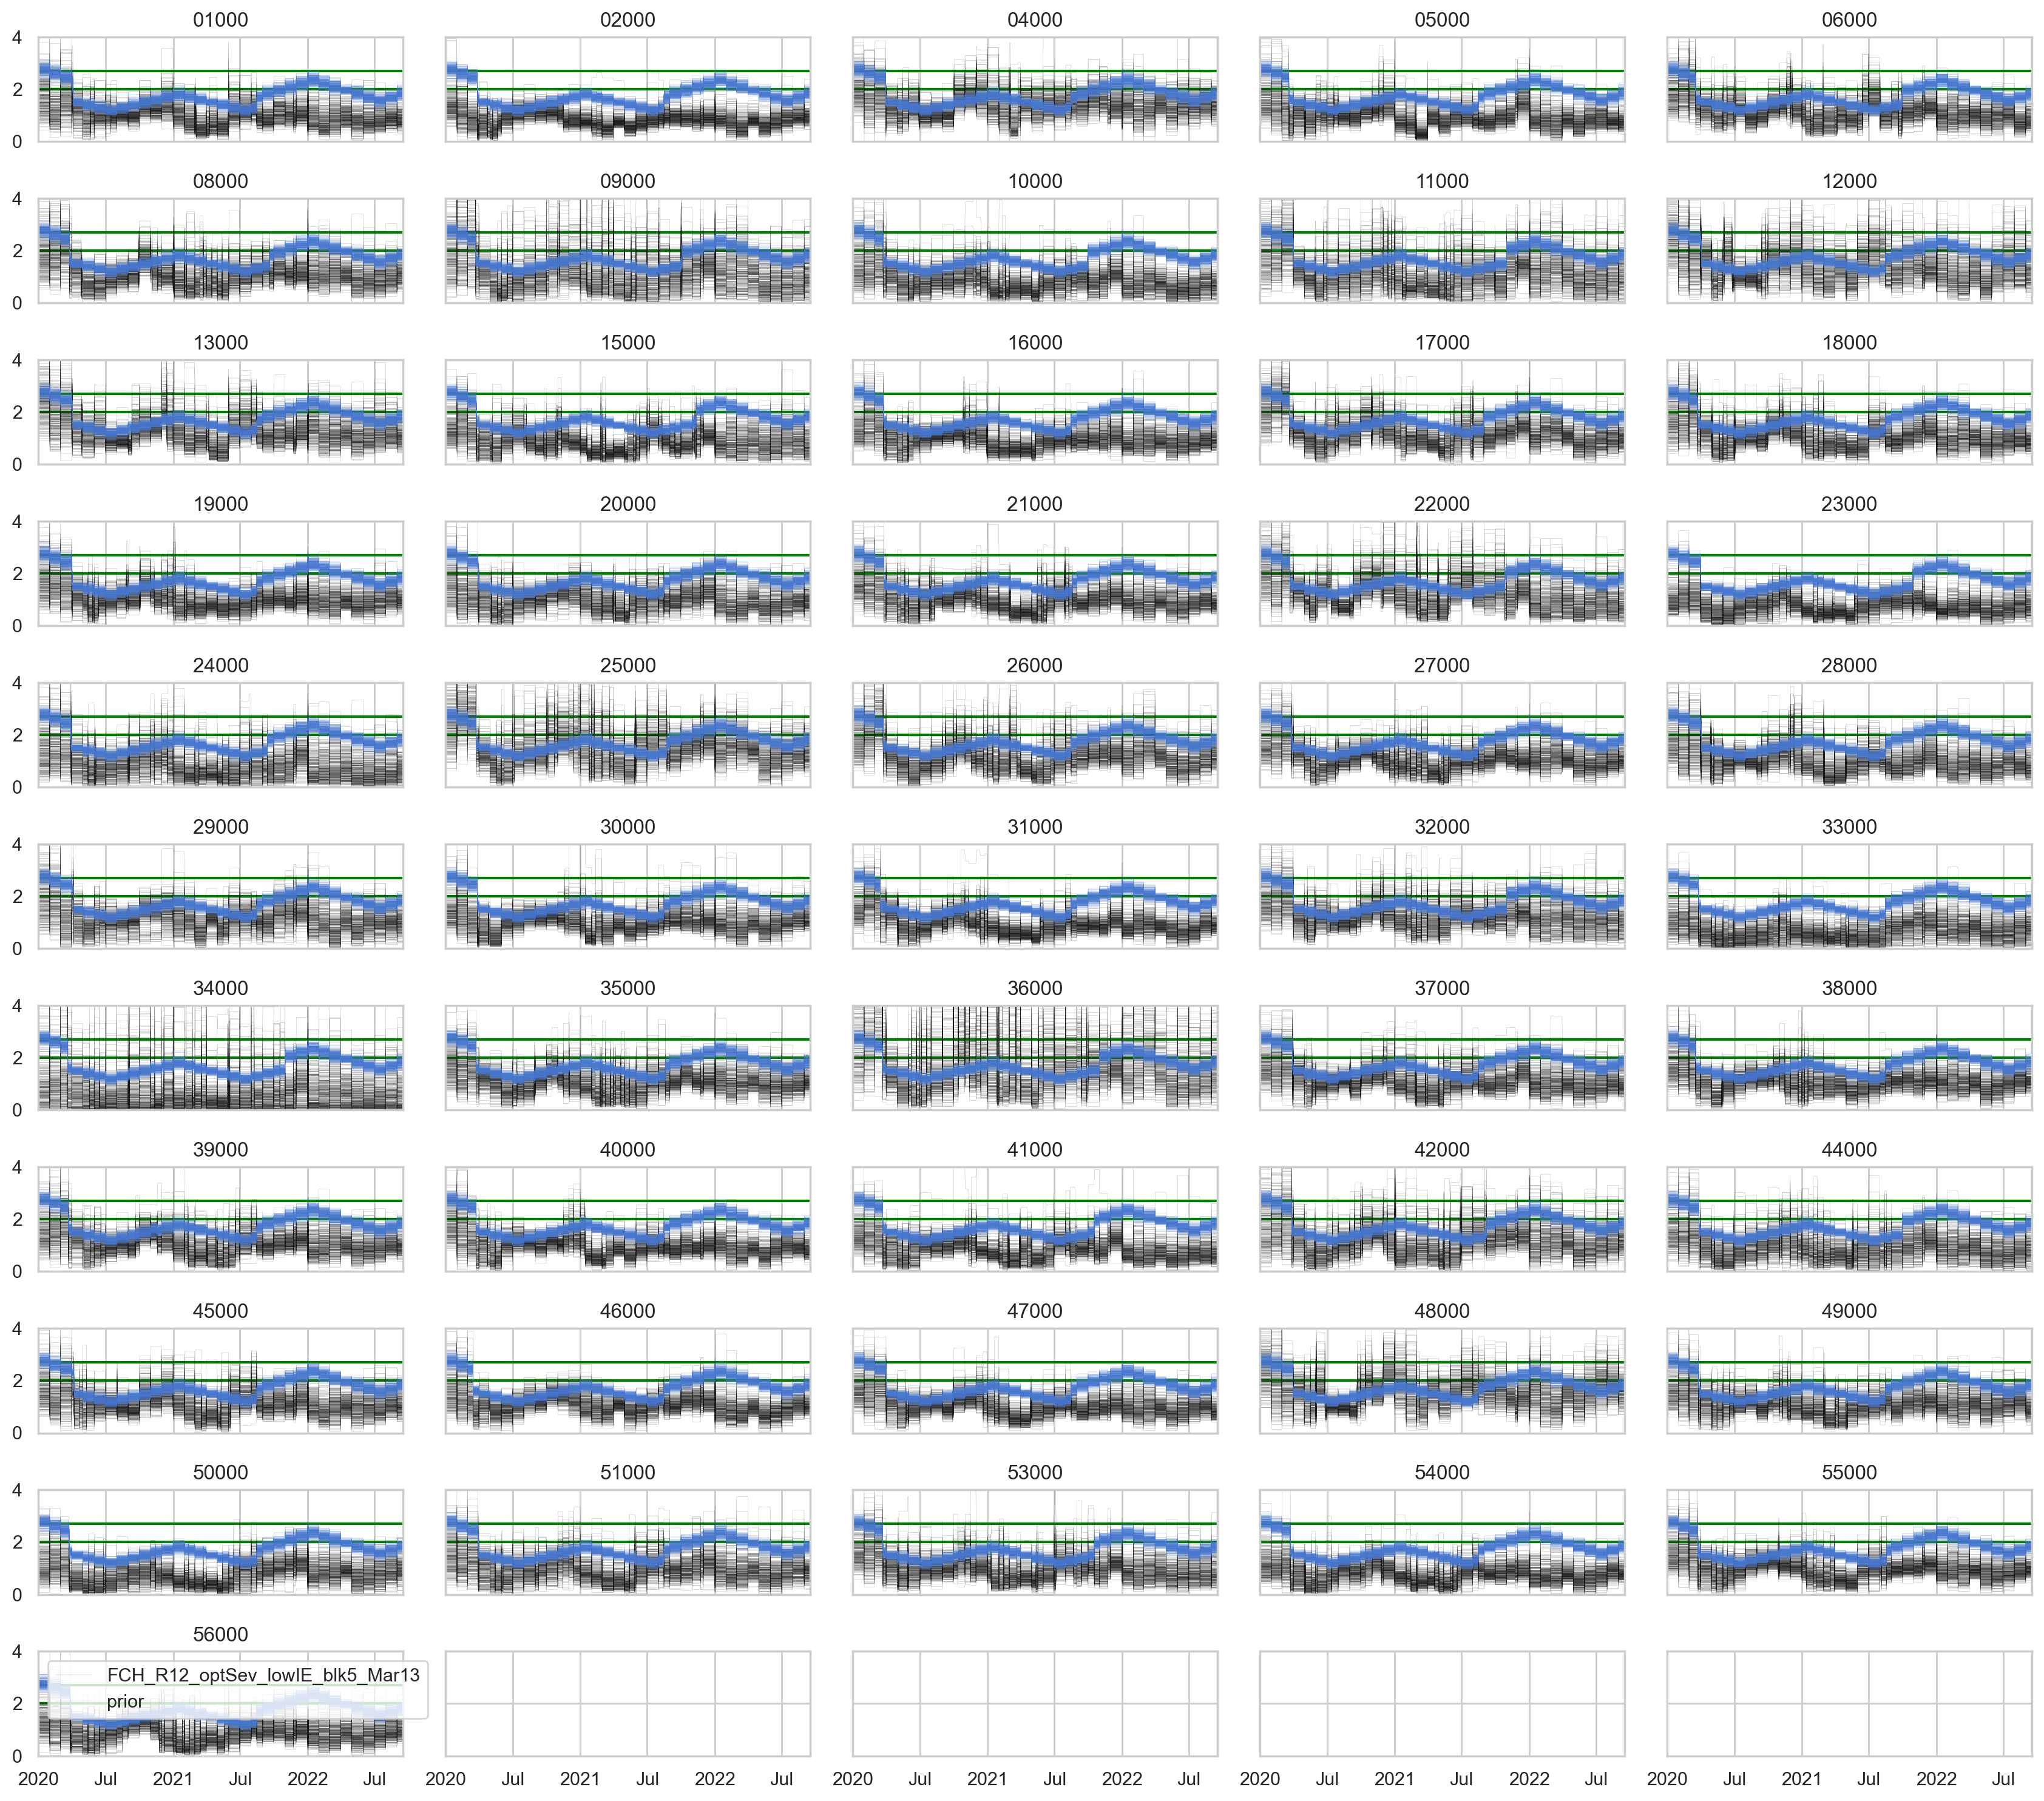

In [170]:
fig, axes = plt.subplots(11,5, figsize = (17,15), dpi = 200, sharex=True, sharey=True)

colors = ['k', 'b','orange', 'green']
geoids = ts[['r0', 'geoid', 'date']].pivot(columns='geoid', values='r0', index='date').columns
i = 0
for run_name, run_spec in reduced_params.items():
    label = run_name
    if label=='to': label = "FCH_R12_optSev_lowIE_blk5_Mar13"
    print(run_name, len(reduced_params[run_name]))
    for sim, ts in enumerate(reduced_params[run_name]):
        a = ts[['r0', 'geoid', 'date']].pivot(columns='geoid', values='r0', index='date')
        for s, st in enumerate(geoids):
            ax = axes.flat[s]
            ax.plot(a[st], colors[i],  ls='-', alpha=0.5, label = label, lw=.1) # lw = int(sim),
            if sim == 19 and run_name=='prior':
                
                ax.set_ylim(0,4)
                ax.grid()
                ax.hlines(2.0, xmin=a.index[0], xmax=a.index[-1], color='green')
                ax.hlines(2.7, xmin=a.index[0], xmax=a.index[-1], color='green')
                ax.set_xlim(a.index[0],a.index[-1])
                ax.set_title(st)
                
                ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
                ax.xaxis.set_minor_locator(mdates.MonthLocator())
                ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
                ax.grid()
                
        label = '_'
       
       # ax.set_yscale('log')
    i+=1
fig.tight_layout()
fig.set_facecolor('white')
ax.legend()
plt.savefig('snpi.pdf')

In [228]:
dates = ['2022-01-15', '2021-07-01', '2021-01-15', '2020-07-01']
full_df = []
for run_name, run_spec in reduced_params.items():
    label = run_name
    #if label=='to': label = "post"
    for sim, ts in enumerate(reduced_params[run_name]):
        a = ts[['r0', 'geoid', 'date']]
        a = a[a.date.isin(dates)]
        a['source'] = label
        full_df.append(a)
full_df = pd.concat(full_df)
full_df['date'] = full_df['date'].astype(str)

AttributeError: 'PathCollection' object has no property 'xlim'

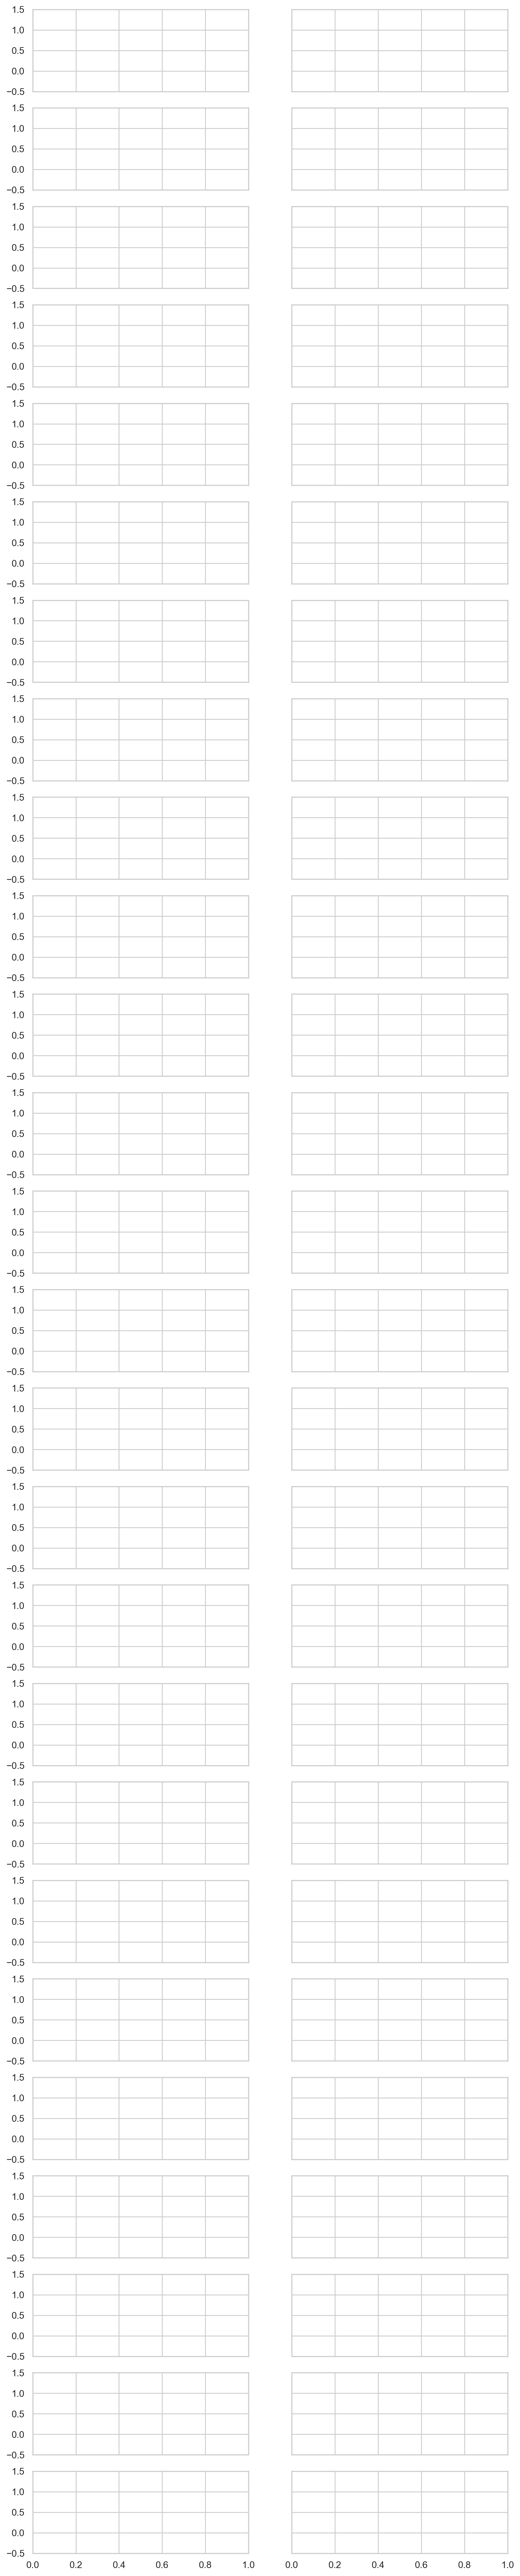

In [132]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
full_df['date'] = full_df['date'].astype(str)

fig, axes = plt.subplots(26,2, figsize = (10,55), dpi = 200, sharex=True, sharey=True)

for s, st in enumerate(geoids):
    ax = axes.flat[s]
    df = full_df[full_df['geoid']==st]

    g = sns.swarmplot(data=df, x="r0", y="date", hue="source", ax=ax, size=4, dodge = True,  alpha=.25, xlim=(0,3))
    #g.legend(fontsize=5)

    ax.set_title(st)

fig.tight_layout()

plt.savefig('snpi_slice.pdf')

AttributeError: 'PathCollection' object has no property 'kwargs'

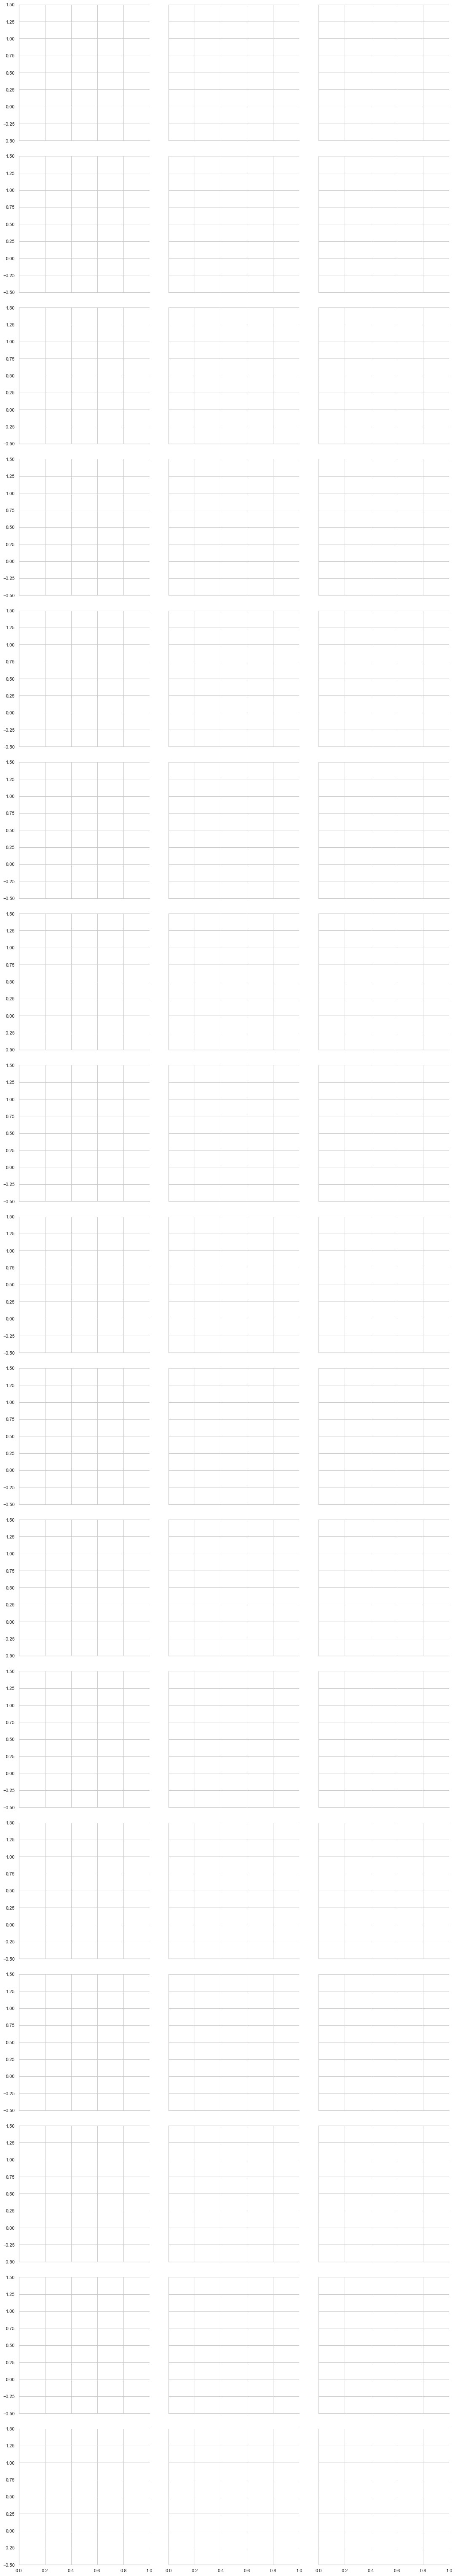

In [140]:
g = sns.catplot(data=full_df, x="r0", y="date", hue="source", col='geoid', col_wrap=3, kind='swarm', kwargs={"size":3, "dodge": True,  "alpha":.25})
g.set(xlim=(0, 3))

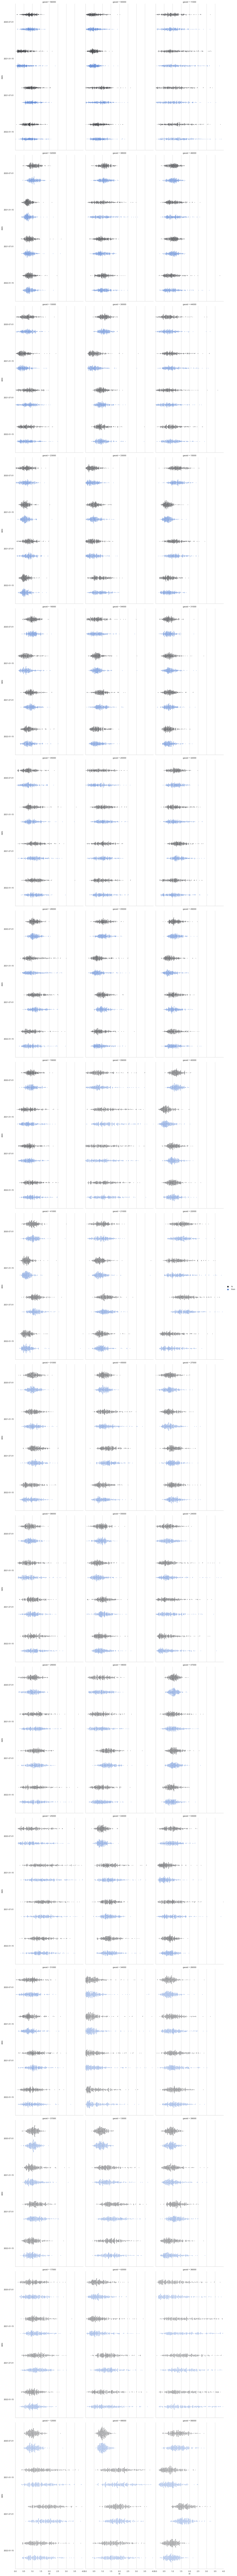

In [230]:
full_df=full_df[full_df["source"]!="prior"]
g = sns.FacetGrid(full_df, col='geoid', col_wrap=3, height=12, aspect=.5, palette='Set3')
g.map_dataframe(sns.swarmplot, x="r0", y="date", hue="source", size=2, dodge = True,  alpha=1)
g.set(xlim=(0, 4))
g.add_legend()
plt.savefig('snpi_slice_resume.pdf')
#g.map_dataframe(sns.pointplot, x="time", y="pulse", color="red")

In [ ]:
for run_name, run_spec in all_runs.items():
    seed_df = seeds[run_name][0]
    seed_df = seed_df[seed_df['destination_infection_stage']=='E']
    print(f"run_name: {run_name}, first_seed: {seed_df['date'].min()}, last_seed: {seed_df['date'].max()}, total seed: {seed_df['amount'].sum()}")


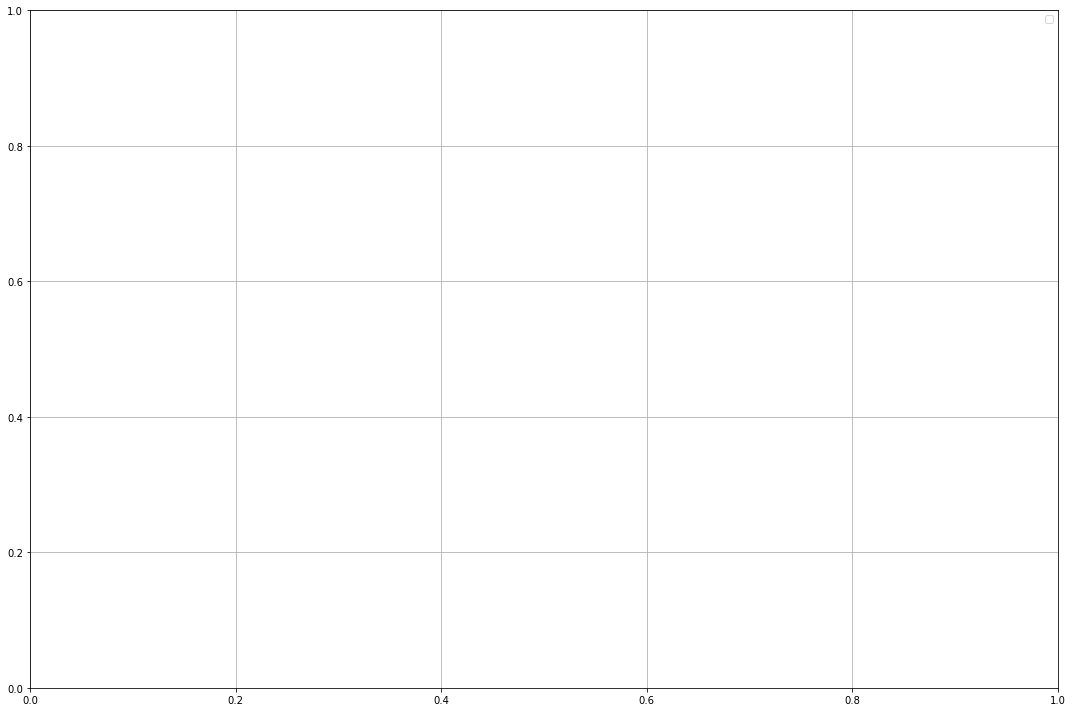

In [5]:
fig, axes = plt.subplots(1,1, figsize = (15,10))

colors = ['r', 'b','orange', 'green']
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']
ax = axes
i = 0
for run_name, run_spec in all_runs.items():
    label = run_name
    for sim, ts in enumerate(r0s[run_name]):
        a = pd.DataFrame(index = pd.date_range(s.ti, s.tf), data = ts.mean(axis=1))
        ax.plot(a, colors[i],  ls='-', alpha=0.7, label = label, lw=2) # lw = int(sim),
        label = '_'
       
       # ax.set_yscale('log')
    i+=1
fig.tight_layout()
fig.set_facecolor('white')
ax.legend()
ax.grid()
#ax.set_xlim('2021-05-01','2021-11-01')
#ax.set_ylim(0.4,0.6)

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (15,15), sharex = True, sharey=True)
fig.set_facecolor('white')
colors = ['r', 'b','g']
j = 0

for name, dc in all_runs.items():
    k=0
    for sim, ts in enumerate(betas[name]):
        for i, nd in enumerate(s.spatset.nodenames):
            if  k == 0:
                ax.flat[i].plot(ts[nd], color = colors[j], alpha = .5, lw = 2, label = name)
                k = 1
            else:
                ax.flat[i].plot(ts[nd], color = colors[j], alpha = .5, lw = 2)
            ax.flat[i].set_title(nd)
            ax.flat[i].grid()
                
    j += 1
ax.flat[0].legend()
fig.tight_layout()
fig.autofmt_xdate()
fig.savefig('seir_npi.pdf')

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (15,15), sharex = True, sharey=True)
fig.set_facecolor('white')
colors = ['r', 'b', 'g']
j = 0

for name, dc in all_runs.items():
    k=0
    df = pd.concat(betas[name])
    df = df.groupby(df.index).mean()
    for i, nd in enumerate(s.spatset.nodenames):
            ax.flat[i].plot(df[nd], color = colors[j], alpha = 1, lw = 3, label = name)
            ax.flat[i].set_title(nd)
            ax.flat[i].grid()
                
    j += 1
ax.flat[0].legend()
fig.tight_layout()
fig.autofmt_xdate()
fig.savefig('seir_npi_mean.pdf')

In [ ]:
pd.DataFrame(betas[name])

In [ ]:
fig, ax = plt.subplots(5,1, figsize = (30,30), sharex = True, sharey=True)
fig.set_facecolor('white')
#colors = ['r', 'b']
j = 0

for name, dc in all_runs.items():
    k=0
    for sim, ts in enumerate(r0s[name]):
        for i, nd in enumerate(s.spatset.nodenames):
            if  k == 0:
                ax.flat[i].plot(ts.T[i], color = colors[j], alpha = .7, lw = 2, label = name)
                k = 1
            else:
                ax.flat[i].plot(ts.T[i], color = colors[j], alpha = .7, lw = 2)
            ax.flat[i].set_title(nd)
            ax.flat[i].grid()
                
    j += 1
ax.flat[0].legend()
fig.tight_layout()
fig.autofmt_xdate()
fig.savefig('seir_beta.pdf')

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (10,15))

colors = ['r', 'b','orange', 'green']
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']
linestyle = ['-', ':', '-.']

comptoplot = ['S','R', 'diffI']

for k, cp in enumerate(comptoplot):
    ax = axes[k]
    i = 0
    for name, dc in all_runs.items():
        label = name
        ts_all = []
        for sim, ts in enumerate(diffIs[name]):
            ts = ts[ts['comp']==cp].drop('comp', axis=1).set_index('time').pivot(columns = 'p_comp').sum(axis=1,level=1)
            ts_all.append(ts)
            for j in ts.columns:
                ax.plot(ts[j], colors[i],  ls=linestyle[int(j)], alpha=0.5, label = label + f' pcomp{int(j)}', lw=1,) # lw = int(sim),
                pass
            label = '_'
        ax.plot(pd.concat(ts_all, axis=1).loc[:,0.0].mean(axis=1),colors[i], ls='--', alpha=0.7, label = label + f' mean', lw=3,) # lw = int(sim),
            

           # ax.set_yscale('log')
        i+=1

    ax.legend()
    ax.grid()
    ax.set_title(cp)
    #ax.set_xlim('2021-05-01','2021-11-01')
fig.tight_layout()
fig.set_facecolor('white')
#
#ax.set_ylim(0,100000)
fig.savefig('comps.pdf')

In [ ]:
pd.concat(ts_all, axis=1).loc[:,0.0]

In [ ]:
fig, axes = plt.subplots(4,1, figsize = (10,15))

colors = ['r', 'b','orange', 'green']
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']
linestyle = ['-', ':', '-.']

comptoplot = ['S','R', 'I1', 'E']

for k, cp in enumerate(comptoplot):
    ax = axes[k]
    i = 0
    for name, dc in all_runs.items():
        label = name
        ts_all = []
        for sim, ts in enumerate(diffIs[name]):v
            ts = ts[(ts['mc_infection_stage']==cp) & (ts['value_type']=='prevalence')]
            ts = ts.drop(['value_type', 'mc_infection_stage', 'mc_name'],axis=1)
            ts = ts.set_index('date').pivot(columns = 'mc_vaccination_stage').sum(axis=1,level=1)
            ts_all.append(ts)
            for idx, cn in enumerate(ts.columns):
                ax.plot(ts[cn], colors[idx],  ls=linestyle[int(idx)], alpha=0.8, label = label + f' {cn}', lw=2,) # lw = int(sim),
                pass
            label = '_'
        #ax.plot(pd.concat(ts_all, axis=1).loc[:,0.0].mean(axis=1),colors[i], ls='--', alpha=0.7, label = label + f' mean', lw=3,) # lw = int(sim),


           # ax.set_yscale('log')
        i+=1

    ax.legend()
    ax.grid()
    ax.set_title(cp)
    #ax.set_xlim('2021-05-01','2021-11-01')
fig.tight_layout()
fig.set_facecolor('white')

In [ ]:
#ts = diffIs[name][0]
#ts = ts[(ts['mc_infection_stage']==cp) & (ts['value_type']=='prevalence')]
#ts = ts.drop(['value_type', 'mc_infection_stage'],axis=1)
ts = ts[(ts['value_type']=='prevalence')]
ts = ts.drop(['value_type'],axis=1)
geoids = [i for i in ts.columns if ('mc_' not in i and i != 'date')]
ts['value'] = ts[geoids].sum(axis=1)
ts = ts.drop(geoids, axis=1)
#ts = ts.set_index('date')
mcs =  [i for i in ts.columns if ('mc_' in i)]
#ts.drop([mc for mc in mcs if mc != 'mc_vaccination_stage'], axis=1).pivot(columns='mc_vaccination_stage', values='value', index='date')
ts.groupby(['date', 'mc_vaccination_stage']).sum().reset_index().pivot(index='date', columns='mc_vaccination_stage', values='value').plot()

In [ ]:
a.plot()

In [ ]:
a = ts.groupby(['date', 'mc_vaccination_stage']).sum().reset_index().pivot(index='date', columns='mc_vaccination_stage', values='value')
b = a['1dose'] + a['2dose'] + a['waned']
(b/a.sum(axis=1)).plot(grid=True)

In [ ]:
seirf = pq.read_table('s3pull/test/seir/USA/inference/med/FCH_R12_optSev_lowIE_blk5_Feb13/global/final/000000010.FCH_R12_optSev_lowIE_blk5_Feb13.seir.parquet').to_pandas()
ts = seirf

In [ ]:
colors = ['r', 'b','orange', 'green', 'black', 'grey', 'yellow']
#colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']
linestyle = ['-', ':', '-.', '--']

mcs =  [i for i in diffIs[name][0].columns if ('mc_' in i and 'name' not in i)]
fig, axes = plt.subplots(len(mcs),1, figsize = (10,15))

for k, mc in enumerate(mcs):
    ax = axes[k]
    i = 0
    for l, (name, dc) in enumerate(all_runs.items()):
        #if l == 0:
            label = name
            ts_all = []
            for sim, ts in enumerate(diffIs[name][:5]):
                ts = ts[(ts['value_type']=='prevalence')]
                ts = ts.drop(['value_type'],axis=1)
                geoids = [i for i in ts.columns if ('mc_' not in i and i != 'date')]
                ts['value'] = ts[geoids].sum(axis=1)
                ts = ts.drop(geoids, axis=1)
                ts = ts.groupby(['date', mc]).sum().reset_index().pivot(index='date', columns=mc, values='value')
                ts_all.append(ts)
                for idx, cn in enumerate(ts.columns):
                    if 'E' in cn or mc != 'mc_infection_stage':
                        ax.plot(ts[cn], linestyle=linestyle[l], alpha=0.8, label = label + f' {cn}', lw=2, color = colors[idx]) # lw = int(sim),
                    pass
                label = '_'
            #ax.plot(pd.concat(ts_all, axis=1).loc[:,0.0].mean(axis=1),colors[i], ls='--', alpha=0.7, label = label + f' mean', lw=3,) # lw = int(sim),


               # ax.set_yscale('log')
            i+=1

    ax.legend()
    ax.grid()
    ax.set_title(mc)
    #ax.set_xlim('2021-05-01','2021-11-01')
fig.tight_layout()
fig.set_facecolor('white')
fig.savefig('comps.pdf')

In [ ]:
l

In [ ]:
colors = ['r', 'b','orange', 'green', 'yellow', 'r', 'b','orange', 'green', 'yellow']
#colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']
linestyle = ['-', ':', '-.', '--']

mcs =  [i for i in diffIs[name][0].columns if ('mc_' in i and 'name' not in i)]
fig, axes = plt.subplots(1,1, figsize = (15,7))

for k, mc in enumerate(['mc_infection_stage']):
    ax = axes
    i = 0
    for l, (name, dc) in enumerate(all_runs.items()):
        #if l == 0:
            label = name
            ts_all = []
            for sim, ts in enumerate(diffIs[name]):
                ts = ts[(ts['value_type']=='prevalence')]
                ts = ts.drop(['value_type'],axis=1)
                geoids = [i for i in ts.columns if ('mc_' not in i and i != 'date')]
                ts['value'] = ts[geoids].sum(axis=1)
                ts = ts.drop(geoids, axis=1)
                ts = ts.groupby(['date', mc]).sum().reset_index().pivot(index='date', columns=mc, values='value')
                ts_all.append(ts)
                for idx, cn in enumerate(ts.columns):
                    if cn == 'E':
                        ax.plot(ts[cn], color=colors[l], alpha=0.8, label = label + f' {cn}', lw=2,) # lw = int(sim),
                    pass
                label = '_'
            #ax.plot(pd.concat(ts_all, axis=1).loc[:,0.0].mean(axis=1),colors[i], ls='--', alpha=0.7, label = label + f' mean', lw=3,) # lw = int(sim),


               # ax.set_yscale('log')
            i+=1

    ax.legend()
    ax.grid()
    ax.set_title(mc)
    ax.set_xlim(ts.index[0],ts.index[-1])
fig.tight_layout()
fig.set_facecolor('white')

In [ ]:
diffIs[name][0]

# NON COMPARISON CONVERGENCE ANALYSIS

In [ ]:
for name, dc in all_runs.items():

    config.clear()
    config.read(user=False)
    config.set_file(dc['config'])
    scenario = 'inference'
    deathrate = 'med'
    spatial_config = config["spatial_setup"]
    stoch_traj_flag = True
    index = 0
    run_id = 0
    prefix = 0
    spatial_base_path = pathlib.Path(dc['geodata'] + spatial_config["base_path"].get())
    scenario = scenario
    deathrate = deathrate
    stoch_traj_flag= stoch_traj_flag # Truthy: stochastic simulation, Falsy: determnistic mean of the binomial draws
    nsim = 10
    interactive = False
    write_csv = False
    write_parquet = True
    npi_df = []

    s = setup.Setup(
        setup_name=config["name"].get() + "_" + str(scenario),
        spatial_setup=setup.SpatialSetup(
            setup_name=spatial_config["setup_name"].get(),
            geodata_file=spatial_base_path / spatial_config["geodata"].get(),
            mobility_file=spatial_base_path / spatial_config["mobility"].get(),
            popnodes_key=spatial_config["popnodes"].get(),
            nodenames_key=spatial_config["nodenames"].get()
        ),
        nsim=nsim,
        npi_scenario=scenario,
        npi_config=config["interventions"]["settings"][scenario],
        seeding_config=config["seeding"],
        ti=config["start_date"].as_date(),
        tf=config["end_date"].as_date(),
        interactive=interactive,
        write_csv=write_csv,
        write_parquet=write_parquet,
        dt=config["dt"].as_number(),
        first_sim_index = index,
        in_run_id = run_id,
        in_prefix = prefix,
        out_run_id = run_id,
        out_prefix = prefix
    )

    folder = [x for x in Path(dc['path']).glob('**') if not x.is_file()]

    folder.reverse()

    slots_id = np.arange(1,2)

    betas = {blk:{} for blk in slots_id}

    for fold in folder:
        print(fold)
        print(f'Exploring {str(fold)[:]} ... ', end = '')
        files_loaded = 0
        for hpar_fn in tqdm(Path(str(fold)).rglob('*.parquet')):
            hpar_fn = str(hpar_fn)
            if ('chimeric' not in hpar_fn):
                #hpar =  pq.read_table(hpar_fn).to_pandas()
                #delay = int(list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'delay')].value)[0])
                #vals = list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'probability')].value)
                #hospf = pq.read_table(hpar_fn.replace('hpar', 'hosp')).to_pandas()
                #seirf = pq.read_table(hpar_fn.replace('hpar', 'seir')).to_pandas()
                slot = int(hpar_fn.split('/')[-1].split('.')[0])
                sim = hpar_fn.split('/')[-1].split('.')[1]
                if slot in slots_id and not isinstance(sim, str):
                    sim = int(sim)
                    snpi = pq.read_table(hpar_fn).to_pandas()
                    #spar = pq.read_table(hpar_fn.replace('hpar', 'spar')).to_pandas()
                    npi = NPI.NPIBase.execute(
                        npi_config=s.npi_config,
                        global_config=config,
                        geoids=s.spatset.nodenames,
                        loaded_df = snpi)
                    p_draw = setup.parameters_load(hpar_fn.replace('snpi', 'spar')[:-8],
                        'parquet',
                        len(s.t_inter),
                        s.nnodes
                    )

                    parameters = setup.parameters_reduce(p_draw, npi, s.dt)
                    betas[slot][sim] = npi.getReduction('r0').T['06000']#.mean(axis=1) #parameters[1].mean(axis = 1)

                    #reduc = snpi.set_index('npi_name').T
                    #reduc.columns = [n.lower() for n in reduc.columns]
                    #reduc = reduc.loc[['reduction','geoid']].T.reset_index()
                    #reduc['reduction'] = pd.to_numeric(reduc['reduction'])
                    #npi_df = npi_df.append(reduc)

                    files_loaded += 1

        print(files_loaded, 'files read')



In [ ]:
npi.getReduction('r0').T['06000']

In [ ]:
np.arange(1,1)

In [ ]:
betas[blk]

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (15,10), sharex = True, sharey = True, dpi = 300)

cmap = cm.gist_heat
normalize = mcolors.Normalize(vmin=1, vmax=20)

for blk in slots_id:
    ax = axes.flat[blk-1]
    for sim, ts in betas[blk].items():
        color = cmap(normalize(int(sim)))
        ax.plot(ts,  alpha = 1, lw = 2, c=color)
        ax.set_title(f'random slot {blk}')
        ax.set_ylim(0.05, 0.4)
        ax.set_ylim(0.05, 1.2)
        ax.grid()
       # ax.set_yscale('log')
fig.tight_layout()
fig.set_facecolor('white')
s_map = cm.ScalarMappable(norm=normalize, cmap=cmap)
fig.colorbar(s_map, label = 'block')#, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g')

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (15,10), sharex = True, sharey = True, dpi = 300)

cmap = cm.gist_heat
cmap = cm.tab20c
normalize = mcolors.Normalize(vmin=0, vmax=300)

for blk in slots_id:
    ax = axes.flat[blk-1]
    for sim, ts in betas[blk].items():
        color = cmap(normalize(int(sim)))
        ax.plot(ts,   ls='-', c=color, alpha=0.6) # lw = int(sim),
        ax.set_title(f'random slot {blk}')

        ax.grid()
       # ax.set_yscale('log')
fig.tight_layout()
fig.set_facecolor('white')
s_map = cm.ScalarMappable(norm=normalize, cmap=cmap)
fig.colorbar(s_map, label = 'block')#, spacing='proportional', ticks=colorparams, boundaries=boundaries, format='%2.2g')

In [ ]:
iris = npi_df
#iris = iris.sort_values('index')
#iris = iris[iris['geoid'].isin(['00001', '00002', '00003'])]

grid = sns.FacetGrid(iris, col="geoid", hue="geoid", palette="tab20c", height=4.5, col_wrap=5)


def quantile_plot(index, reduction, **kwargs):
    sns.violinplot(x=index, y=reduction, #hue="geoid",
                   dodge=True,  zorder=1)#Ç, scale='width')#, alpha=.25,capsize=.8, size = .2, errwidth=.75);
    sns.pointplot(x="index", y="reduction", data = npi_truth[npi_truth['geoid']==kwargs['label']], dodge=.532, join=False, #palette="dark",
              markers="d", scale=1.75, ci=None,zorder=102, color="black")
    #plt.scatter((1,1),  **kwargs)

# Draw a line plot to show the trajectory of each random walk
#grid.map(sns.violinplot, 'index', "reduction" )#, marker="o")
grid.map(quantile_plot, 'index', "reduction" )#, marker="o")

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
#         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))


for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        
# Adjust the arrangement of the plots
grid.fig.suptitle(run_name)

grid.fig.tight_layout(w_pad=1)

In [ ]:
grid.savefig('npi_vals.pdf')

In [ ]:
pdf.savefig(grid.fig)

In [ ]:
iris = hosp_df[hosp_df['comp']=='incidC']
#iris = iris.sort_values('index')
#iris = iris[iris['geoid'].isin(['00001', '00002', '00003'])]

grid = sns.FacetGrid(iris, col="geoid", hue="geoid", palette="tab20c", height=4.5, col_wrap=5)

# Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c=".5")

def quantile_plot(index, reduction, **kwargs):
    sns.lineplot(x=index, y=reduction, color = 'orange',#hue="geoid",
                    zorder=1)#Ç, scale='width')#, alpha=.25,capsize=.8, size = .2, errwidth=.75);
    sns.lineplot(x="time", y="value", data = hosp_truth[(hosp_truth['comp']=='incidC') & (hosp_truth['geoid']==kwargs['label'])],color="black")
                  #dodge=.532, join=False, #palette="dark",
             # markers="d", scale=1.75, ci=None,zorder=102, 
    #plt.scatter((1,1),  **kwargs)

# Draw a line plot to show the trajectory of each random walk
#grid.map(sns.violinplot, 'index', "reduction" )#, marker="o")
grid.map(quantile_plot, 'time', "value" )#, marker="o")

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
#         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))


for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        
# Adjust the arrangement of the plots
grid.fig.suptitle(run_name)

grid.fig.tight_layout(w_pad=1)

In [ ]:
pdf.savefig(grid.fig)

In [ ]:
betas = np.array(betas)

In [ ]:
betas = betas[:,::4,:]

In [ ]:
#all_vals = np.array(all_vals)
#fig, ax = plt.subplots(7,8, figsize = (20,20), sharex = True)
#for i in range(50):
#    ax.flat[i].hist(all_vals[i::50])
#    ax.flat[i].set_title('geoid' + str(i))

In [ ]:
betas = np.array(betas)
fig, ax = plt.subplots(65//10,11, figsize = (30,30), sharex = True)
for i in range(65):
    beta = betas[:,:,i].T
    #ax.flat[i].plot(beta[:,:20], color = 'b', lw = .5, alpha = .5)
    ax.flat[i].fill_between(np.arange(beta.shape[0]), np.quantile(beta,.05,axis=1), np.quantile(beta,.95,axis=1), alpha = .07, color = 'g')
    ax.flat[i].fill_between(np.arange(beta.shape[0]), np.quantile(beta,.25,axis=1), np.quantile(beta,.75,axis=1), alpha = .2, color = 'g')
    ax.flat[i].plot(np.quantile(beta,.5,axis=1), color = 'orange', alpha = 1)
    ax.flat[i].plot(np.mean(beta, axis=1), color = 'r', alpha = 1, lw =2)
    #ax.flat[i].plot(beta_truth[:,i], color = 'k', lw =2)
    ax.flat[i].set_title(s.spatset.nodenames[i])
#fig.suptitle('black is truth | red is mean | blue is 90%');
fig.tight_layout()

In [ ]:

fig, ax = plt.subplots(1,1, figsize = (5,5), sharex = True)

all_beta = np.sum(betas, axis=2)

all_beta = np.zeros_like(betas[:,:,0])
for pl in range(betas.shape[2]):
    all_beta += betas[:,:,pl] * s.spatset.popnodes[pl]
    
all_beta /= s.spatset.popnodes.sum()
    

#ax.flat[i].plot(beta[:,:20], color = 'b', lw = .5, alpha = .5)
ax.fill_between(np.arange(all_beta.shape[1]), np.quantile(all_beta,.05,axis=0), np.quantile(all_beta,.95,axis=0), alpha = .07, color = 'g')
ax.fill_between(np.arange(all_beta.shape[1]), np.quantile(all_beta,.25,axis=0), np.quantile(all_beta,.75,axis=0), alpha = .2, color = 'g')
ax.plot(np.quantile(all_beta,.5,axis=0), color = 'orange', alpha = 1)
#ax.plot(np.mean(beta, axis=1), color = 'r', alpha = 1, lw =2)
#ax.flat[i].plot(beta_truth[:,i], color = 'k', lw =2)
#ax.flat[i].set_title('geoid' + str(i))
#fig.suptitle('black is truth | red is mean | blue is 90%');
fig.tight_layout()

In [ ]:
fig.savefig('beta_vals.pdf')

In [ ]:
betas.shape

In [ ]:
pdf.close()

In [ ]:
np.quantile(np.sumbeta,.5,axis=1).shape

In [ ]:
np.sum(betas, axis=2

In [ ]:
betas.shape

In [ ]:
1400/4